In [17]:
# For interactive plots
%matplotlib ipympl  

from IPython.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

from plv.data import load_verbraucherpreisindex, corona_begin, max_inflation
from plv.plot import plot_ts, plot_seasonality, InteractiveForecastPlot

inflation = load_verbraucherpreisindex(filter_columns=["inflation"])

[TODO] 
- QR Code zu Binder Präsentation, Tiny URL verwenden?
- Es kann bis zu 30 Sekunden dauern, bis die Präsentation gestartet wird.
- Kurzes Intro zu Bedienung:
    - Space
    - Shift + Tab
    - Zommen der Website

<div align="center" style="font-size:60px;">
Probelehrveranstaltung für die Professur für Angewandte Mathematik mit Schwerpunkt Statistical Learning
<br><br>
Stationarität von Zeitreihen mit Anwendung an einem praktischen Beispiel
<br><br>
Dr. Fabian Spanhel
<div/>
    
<div align="left" style="font-size:16px;">
<div/>



[TODO] Evtl. TOC?
- About me
- Einführung und Motivation [5 Min]
- Illustration des Zusammenhangs zwischen Zeitreihendaten und -prozess
- Stationarität
    - Definition [4 Min]
    - Illustration anhand AR(1) [6 Min]
    - Testen von Stationarität [4 Min] -> Low Priority
- Praktische Anwendung auf X Daten [10 Min]

- Lernziele sind, dass die Studierende den Zusammenhang zwischen Prozess und Daten verstehen 
- Die Definition der schwache Stationariät kennen
- Den AR(1) Prozess kennenlernen und wann er stationär ist
- Eine praktische Anwendung einens stationären AR(1) Prozess sehen

# About me [TODO: Auf Deutsch]
<br>
<br>
<div style="font-size:40px;">
Dr. rer. nat. Fabian Spanhel
<div/>
    
<div align="left" style="font-size:32px;">
<div/>
<br>

- Studies in economics with a focus on econometrics & statistics
- PhD in statistics
- Since November 2016 working as a Data Scientist at ProSiebenSat.1

# Einführung und Motivation
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

- Wer von Ihnen hat einen Indexmietvertrag? 
    Mit einer Indexmiete vereinbaren Mieter und Vermieter bereits im Mietvertrag, dass sich die Kaltmiete erhöht, wenn die Verbraucherpreise steigen. Die Preise ermittelt regelmäßig das Statistische Bundesamt und veröffentlicht sie in dem sogenannten Verbraucherpreisindex (VPI).
- Dann teilen vermutlich ein paar unter Ihnen mein Leid, meine Miete wird sich im nächsten Monat nämlich um 12.2 % erhöhnen.
- Wie konnte es soweit kommen dass die Inflationsrate seit 2 Jahren auf den höchsten Stand seit der Wiedervereinigung gestiegen ist? [Corona und die Wirtschaftskrise] haben dazu geführt, dass die Verbraucherpreise, also die Inflation steigen. Weltweit steigen die Produktionskosten, die Lieferketten sind seit der Corona-Pandemie gestört. Infolge des Krieges in der Ukraine kommt es zu Rohstoffengpässen, die das Angebot verknappen – vor allem bei Energie und Getreide.
    - Die Erzeugerpreise sind extrem stark angestiegen und nach und nach reichen die Produzenten diese Preisanstiege an die Verbraucher weiter. Bisher sind es vor allem die Energiepreise, die sich in den Verbraucherpreisen direkt niedergeschlagen haben. Aber da sollte man sich nicht täuschen lassen.
    - https://zdfheute-stories-scroll.zdf.de/inflation-preise-teuer/index.html
- Grafik Inflation
    - Was bedeutet monatliche Inflation: Die Veränderung des Verbraucherpreisindex zum Vorjahr wird als Inflationsrate bezeichnet

In [2]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18

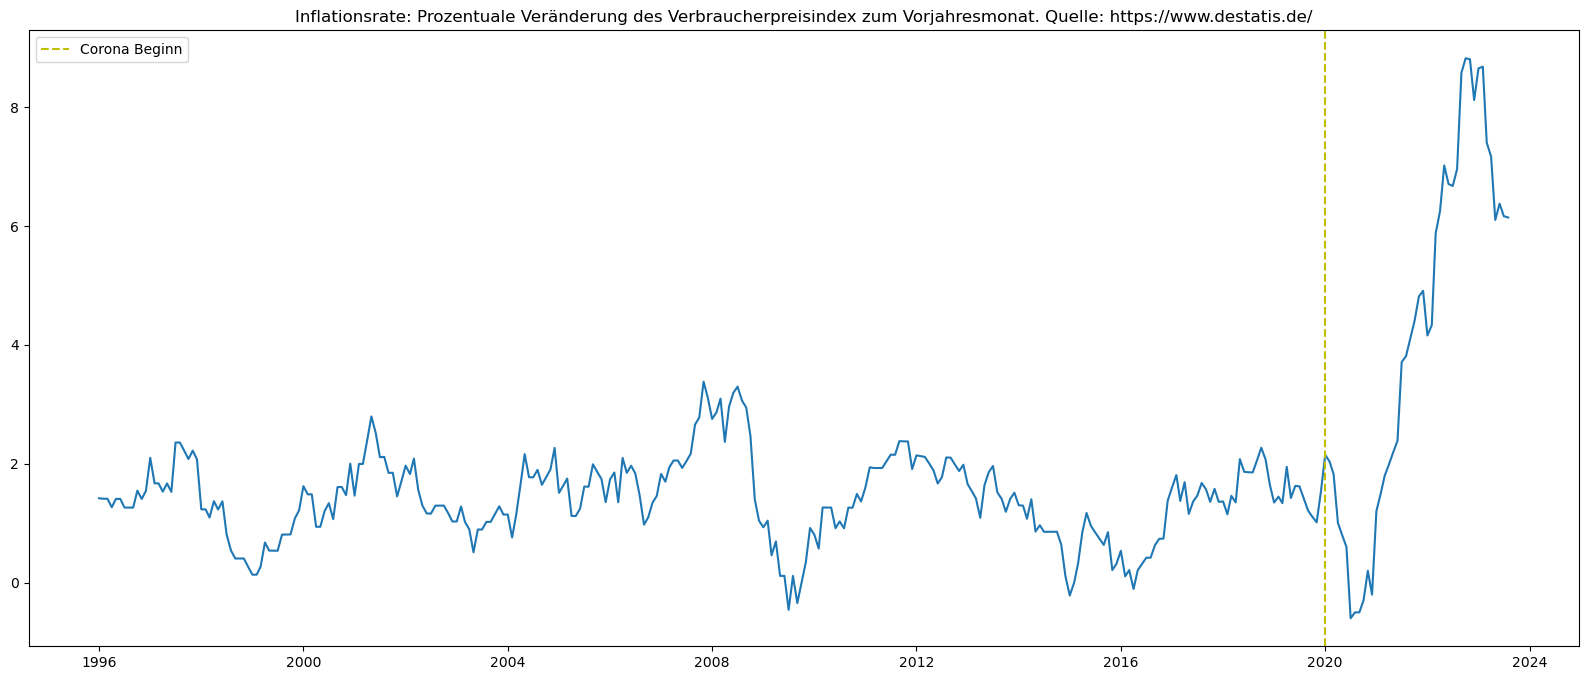

In [13]:
plot_ts(
    data=inflation,
    title="Inflationsrate: Prozentuale Veränderung des Verbraucherpreisindex zum Vorjahresmonat. Quelle: https://www.destatis.de/",
    size=(20, 8)
)
import matplotlib.pyplot as plt
import pandas as pd
plt.axvline(x=pd.Timestamp(corona_begin), color='y', linestyle='--', label='Corona Beginn')
plt.legend()
# https://www-genesis.destatis.de/genesis/online?sequenz=tabelleErgebnis&selectionname=61111-0002&startjahr=1996#abreadcrumb

- In der Praxis ist es häufig der Fall, dass Daten zu aufeinanderfolgenden Zeitpunkten mit gleichmäßigen Abstand erhoben werden.
- Diese Daten bezeichnen man als **Zeitreihe**.
- Anders als in Querschnittstudien, gibt es durch die Zeit eine natürlich Reihenfolge der Beobachtungen.
- Dies führt in der Regel dazu, dass Beobachtungen, die zeitlich nahe beieinander liegen, enger miteinander verbunden sind als Beobachtungen, die weiter auseinander liegen.
- **Die Zeitreihenanalyse** befasst sich primär mit der Vorhersage von Zeitreihen.

In [ ]:
- Wirtschaftsdaten (Börsenkurse, Zinsindizes, Absatzzahlen), Wetterdaten, Unternehmensdaten
Börsenkurse allgemein, Bevölkerungsentwicklung, Preisindex, Wahlabsichtsbefragungen, Wetterdaten, Zinsindex
- "Die Zeitreihenanalyse befasst sich in der Statistik mit der inferenzstatistischen Analyse von Zeitreihen und der Vorhersage von Trends (Trendextrapolation) zu ihrer künftigen Entwicklung"
- Abhängigkeit durch Zeit an Inflation erklären: Das was in 2008 war relativ egal, was in letzter Zeit passiert

In [ ]:
- Hamilton lesen
- [x] Übungsunterlagen lesen

Im Folgenden, sei $T \subset \mathbb{T} \subset \mathbb{R}$.

Wenn wir von einer (diskreten) Zeitreihe sprechen, können damit zwei verschiedene Begriffe gemeint sein:
1. Eine Zeitreihe ist eine Abfolge von Daten $(y_t)_{t=1,...,T}$, die in zeitlicher Reihenfolge angeordnet sind.
2. Eine Zeitreihe ist ein stochastischer Prozess $(Y_t)_{t\in \mathbb{T}}$, d.h., ein Folge von Zufallsvariablen mit einem Index $t$, der für Zeitpunkte steht.

**Die Verbindung zwischen 1. und 2. ergibt sich dadurch, dass Daten $(y_t)_{t=1,...,T}$ in 1. als eine Stichprobe oder Realisierung eines zugrunde liegenden stochastischen Prozesses $(Y_t)_{t\in \mathbb{T}}$ in 2. aufgefasst werden.**



## Illustration des Zusammenhangs zwischen Zeitreihendaten und -prozess

In [ ]:
- Wichtig dass zu verstehen, in meiner Erfahrung war das unklar für manche Studierende oder sogar Doktoranden, dann ist auch alles leichter

## Annahmen an einen Zeitreihenprozess für die statistische Inferenz und Modellierung
[TODO] Diese Folie weg oder woanders
Für die statistische Inferenz mit Zeitreihen müssen Annahmen getroffen werden, da in der Praxis meist nur eine Realisierung des die Zeitreihe generierenden Prozesses vorliegt. Die Annahme der Ergodizität bedeutet, dass Stichprobenmomente, die aus einer endlichen Zeitreihe gewonnen werden, für 
�
→
∞T\rightarrow \infty  quasi gegen die Momente der Grundgesamtheit konvergieren.

# Stationarität

- In der Literatur gibt es 2 Definition von Stationarität, die Klasse der stochastischen Prozess einschränken
- Wir konzentieren uns hier auf die sogenannte schwache Stationarität

> **DEFINITION:** (Schwache Stationarität) <br>
> Ein stochastischer Prozess $(Y_t)_{t\in \mathbb{T}}$ ist schwach stationär $:\!\!\iff$
>
> 1. $E[Y_t] = \mu \in \mathbb{R}$ <br>
> 2. $Cov[Y_t, Y_{t-h}] = \gamma(h) \in \mathbb{R}$
>
> für alle $\forall t \in \mathbb{T}$ und $\forall h \in \mathbb{T}$.

- Bei beiden Typen von Prozessen besitzen die endlichdimensionalen Verteilungen des Prozesses bestimmte zeitunabhängige Eigenschaften. Diese beziehen sich bei der Stationarität im engeren Sinn auf die gesamte Verteilungsgestalt und bei der Stationarität im weiteren Sinn nur auf die ersten beiden Momente der endlichdimensionalen Verteilungen

## (Strikte Stationarität) und Kovarianzstationarität 
Frage hier an die Studierenden: Welche Definition ist stärker?
Evtl. hier auch wieder Grafik mit 4 Punkten und daran sichtbar machen (auf ZVs Ebene)
    Mittelwert der Trajektorien sollte gleich sein

Evtl. Beispiel für Zeitreihenprozesse, sind die stationär? Darüber abstimmen, mit ja/nein/weiß nicht/kommt drauf an (Es reicht wenn sie die Erwartungs- und Varianzstationarität überprüfen)
1. iid Exponential
1. Summe zweier schwach stationärer Prozesse die voneinander unabhängig sind
1. Weißes Rauschen.
2. MA(1)
3. AR(1)

Laut Andi auch Plots zeigen von nicht stationären Prozessen

## Illustration anhand der Simulation eines (linearen) AR(1) Prozesses

1. Modellgleichung
    1. Autoregressive weil auf sich selbst regressiert, der Ordnung 1 weil ein Lag
    1. Was bedeutet das? Was ist a?
    1. Was ist wenn a negativ ist? Interessant weil ich sehr gut schätzen kann (Bild mit Normalverteilung)
1. Simulationsbilder in Abhängigkeit von a
    1. Simulation nicht stationär weil wir immer mit gleichen Wert starten, aber schauen wir mal was passiert
    1. Evtl. auch erst als Loop und dann durch Matrixmultiplikation effizienter.
<!--
1.	Theoretischen Beweis skizzieren (schon sophisticated, bei Copulas einfacher)
    1. Nur mean stationarität zeigen
    1.	Beweis für Kovarianzstationarität analog (Kovarianz auch nur Erwartungswert), oder E[Y_tY_{t-h}^k], k = 0, 1
    1.	Beweis für strikt stationär schwierig, aber auch |a| <=1
        1.	Stärkere Annahmen and die Abhängigkeit der Störterme
        2.	Keine geschlossene Form für die Multivariate Verteilung im allgemeinen (nur durch Simulationen möglich)
-->

## Skizze des Beweis für die schwache Stationarität des AR(1) Prozesses

---
**THEOREM:** (Hinreichende Bedingungen für die Stationarität eines AR(1) Prozesses) <br>
Sei $Y_t = aY_{t-1} + U_t$, wobei $(U_t)_{t \in \mathbb{Z}}$ ein schwach stationärer stochastischer Prozess ist, so dass $Cov[U_t, U_h]=\sigma_U^2$ für $t=h$ und sonst $Cov[U_t, U_h]=0$ alle $t, h \in \mathbb{Z}$,  und $\sup_{t \in \mathbb{Z}} E[Y_t^2] < \infty$. <br><br>
Falls $|a| < 1$,  dann ist $(Y_t)_{t \in \mathbb{Z}}$ schwach stationär.
---
- Der Beweis dieses Theorems ist nicht trivial.
- Im Folgenden werden die zwei Schritte deshalb nur skizziert.
    1. Limes Repräsentation von $Y_t$ als eine Funktion von $(U_t)_{t \in \mathbb{Z}}$.
    2. Berechung des Erwartungswerts und Kovarianzfunktion von $(Y_t)_{t \in \mathbb{Z}}$.

In der Literatur so nicht so einfach zu finden und nicht exakt

Hier keine Konstante $c$ betrachtet.

**Schritt 1: Limes Repräsentation von $Y_t$ als eine Funktion von $(U_t)_{t \in \mathbb{Z}}$.**

Rekursive Substituierung führt zu
$$
Y_t = aY_{t-1} + U_t = a(aY_{t-2} + U_{t-1}) + U_t = \ldots = \underbrace{a^h Y_{t-h}}_{=:A_h} + \underbrace{\sum_{i=0}^{h-1}a^{i}U_{t-i}}_{=:B_h} =: X_h
$$
Was passiert mit $X_h$, wenn $h\to\infty$?

&#9888;&#65039; Da $X_h:=A_h + B_h$ eine Zufallsvariable ist, müssen wir zunächst eine Konvergenzart wählen.
<br>
---
**DEFINITION:** (Konvergenz im quadratischen Mittel) <br>
Eine Folge von Zufallsvariable $(X_t)_{t\in\mathbb{Z}}$ konvergiert im quadratischen Mittel gegen eine Zufallsvariable $X$ $:\!\!\iff$
$\lim_{t\to\infty} E[(X_t-X)^2] = 0$.
<br>
In diesem Fall schreiben wir $X_t \stackrel{2}{\to} X$.
---
- Man kann zeigen, dass $A_t + B_t \stackrel{2}{\to} A + B$ falls $A_t \stackrel{2}{\to} A$ und  $B_t \stackrel{2}{\to} B$. (Umdrehen)
- Wir können also die Konvergenz von $A_h$ und $B_h$ separat betrachten.
- Dass $A_h \stackrel{2}{\to} 0$, wenn $|a|<1$ und $\sup_{t \in \mathbb{Z}} E[Y_t^2] < \infty$, lässt sich relativ leicht zeigen.
- Dass eine Zufallsvariable $B \in L^2$ existiert, gegen die $B_h$ im quadratischen Mittel konvergiert, folgt daraus, dass der $L^2$ Raum vollständig ist und man zeigen kann, dass $B_h$ eine Cauchy Folge ist falls $|a| < 1$ und $(U_t)_{t\in\mathbb{Z}}$ weißes Rauschen ist.
- Insgesamt folgt also $\exists X \in L^2\colon X_h \stackrel{2}{\to} X$.


- One way to define the distance between X_t and X is the expectation of the squared difference.
- Das ist für uns hilfreich da wir ja später an dem Erwartungswert und der Varianz des Limes interessiert sind.
- [Dreiecksungleichung](https://math.stackexchange.com/questions/4281919/convergence-of-a-linear-combination-of-random-variables), diese kann ich nutzen weil E[(X_t-X)^2] = L2_Norm^2 und die Dreiecksungleichung für die L2_Norm gilt.
- Frage: Wer weiß noch alles was eine Cauchy Folge ist?
- Wieso ist $B_h$ eine Cauchy Folge
$B_h \text{ is Cauchy } \rightarrow E[(B_m-B_n)^2] < \epsilon$
$E[(\sum_{i=N+1}^Ma_iU_{t-i})^2] \stackrel{U is WN}{=} \sum_{i=N+1}^M a^{2i}E[U_{t-i}^2] = E[U_{t-i}^2]\underbrace{\sum_{i=N+1}^M a^{2i}}_{Cauchy}$

**Schritt 2:Berechung des Erwartungswerts und Kovarianzfunktion von $(Y_t)_{t \in \mathbb{Z}}$.**

Durch die Anwendung des [Fubini-Tonelli Theorems](https://en.wikipedia.org/wiki/Fubini's_theorem#Fubini-Tonelli) und der Tatsache, dass $\sum_{i=0}^{\infty}|a^{i}|\in \mathbb{R}$, falls $|a|<1$, und $(U_t)_{t\in\mathbb{Z}}$ Weißes Rauschen ist, folgt

$$
\begin{align*}
E[Y_t] & = E[\sum_{i=0}^{\infty}a^{i}U_{t-i}] \stackrel{|a|<1,\text{ Fubini-Tonelli}}{=} \sum_{i=0}^{\infty}a^{i}\underbrace{E[U_{t-i}]}_{=\ 0} = 0
\end{align*}
$$


$$
\gamma(t, h) = Cov[Y_t, Y_{t-h}] 
%= E[\sum_{i=0}^{\infty}a^{i}U_{t-i} \sum_{j=0}^{\infty}a^{j}U_{t-h-j}] 
\stackrel{|a|<1,\text{ Fubini-Tonelli},\ (U_t)_{t\in\mathbb{Z}} \text{Weißes Rauschen}}{=}
%\ldots
%\sum_{i=0}^{\infty}\sum_{j=0}^{\infty}a^{i}a^{j}\underbrace{E[U_{t-i}U_{t-h-j}}_{\sigma_U^2 \text{ if } i = h + j, \text{ else } 0}]
%\\
%\stackrel{i:=h+j}{=} \sum_{j=0}^{\infty}a^{h+j}a^{j}\sigma_U^2 = a^h\sum_{j=0}^{\infty}a^{2j}\sigma_U^2
\frac{a^h}{1-a^2}\sigma_U^2 \in \mathbb{R}
$$

Somit ist $E[Y_t]=0$ und $\gamma(t, h)$ hängt nicht von $t$ ab. Folglich ist $(Y_t)_{t \in \mathbb{Z}}$ stationär. &#11035;

- Noch offener Punkt, wenn X_h to X, wieso ist dann E[Y_t] = E[X]? Also warum passt das alles?
- [Fubini-Tonelli Theorems](https://en.wikipedia.org/wiki/Fubini's_theorem#Fubini-Tonelli)
https://math.stackexchange.com/questions/1166994/linearity-of-expectation-for-infinite-sums

## Testen auf Stationarität -> Am ende machen, low Priority

Angenommen unsere Daten werden durch den vorher beschriebenen AR(1) Prozess generiert, wie könnte somit ein Test auf (schwache) Stationarität aussehen?

Wie könnte die Null- und Alternativhypothese aussehen?

1. Die vorherigen Simulationen vorhin haben illustriert und der Beweis gezeigt, dass ein AR(1) Prozess (schwach) stationär ist solange |a| < 1 ist.
2. Man könnte also H_0: |a| >= 1 vs. H_1: |a| < 1.
3. Da in der Praxis in der Regel a >= 0, Vereinfachung zu H_0: a >= 1 vs. H_1: a < 1

## Der (Augmented) Dickey-Fuller Test
5. Der Dickey-Fuller Test macht das im Prinzip (verwendet aber die Differenzen)
5. Erweiterung zum Augmented Dickey-Fuller Test

Der (A)DF Test ist vermutlich der populärste Test für die (schwache) Stationarität einer Zeitreihen.
Allerdings ist der damit auch vermutlich einer der Tests dessen Annahmen nicht erfüllt sind.
- Die Zeitreihendaten werden durch einen (linearen) autoregressiven Prozess generiert.
- Die Störterme/Innovationen des Process sind iid N(0, \sigma^2)


Diskussion: 1. Annahme approximation okay, 2. aber eigentlich nie erfüllt.

Evtl. Simulation zeigen, dass ADF Test nicht covered wenn Störterme N(0, \sigma^2)

## Wie teste ich auf Stationarität in der Praxis?
1.	Theoretisches Resultat dass es keinen Test gibt der das asymptotische immer zeigen kann
    1.	Vll. davor: Zeitreihen simulieren von statistischen Prozessen (u.a. Copula) und Frage ob schwach stationär (evtl. hierzu abstimmen)
1.	In der Praxis: Eher inhaltliche Überlegungen
    1.	Deterministische Trends: Saisonalität 
1.	Davon abgesehen: Man kann nicht stationäre Prozess auch mit stationären approximieren (in der next step vorhersage), klappt ganz okay soweit nicht zu weit weg von 


# Praktische Anwendung: Modellierung und Prognose der Inflationsrate

- Keine Kreuzvalidierung nötig, da least-squares benutzt wird, man könnten den autoregressiven Parameter natürlich penalisieren und dann tunen
- Fitten bis 2018, dann Prognose
- fitten bis 2020 (vor Corona und Wirtschaftskrise), dann Prognose
- Diskussion: Ist da ein Strukturbruch passiert? Stationarität verletzt? Es ist möglich, wenn auch eher unwahrscheinlich, dass die Zeitreihen so ansteigt (mit Simulation rausfinden wie wahrscheinlich das ist, dass so ein Trend mindestens beobachtet wird)
- Rein datenbasiert das schwer zu beantworten. Eher Expertenwissen oder komplexere Modell wo externe Faktoren eine Rolle spielen (Konsumausgaben, Wirtschaftliche Entwicklung, was treibt die Inflation)

Wir betrachen ohne Corona
- Am 31. Dezember 2019 wurde der Ausbruch einer neuen Lungenentzündung mit noch unbekannter Ursache in Wuhan in China bestätigt.[5] Am 30. Januar 2020 rief die Weltgesundheitsorganisation (WHO) angesichts der Ausbreitung und schnellen Zunahme der Infektionen mit dem Coronavirus 2019-nCoV eine internationale Gesundheitsnotlage au
- Es gibt mehrere Möglichkeiten wie man schätzt, wie benutzen KQ
Custom deterministic terms (deterministic)

Accepts a DeterministicProcess

Exogenous variables (exog)

A DataFrame or array of exogenous variables to include in the model

$Y_t = c + aY_{t-1} + \delta D_t + U_t$

In [21]:
from plv.model import CrisisDummy, AR1
print(corona_begin)
print(max_inflation)

ar1 = AR1()
dummy = CrisisDummy(start=corona_begin, end=max_inflation)

2020-01-01
2023-02-01


interactive(children=(IntSlider(value=2005, description='Jahr', max=2024, min=2005), IntSlider(value=1, descri…

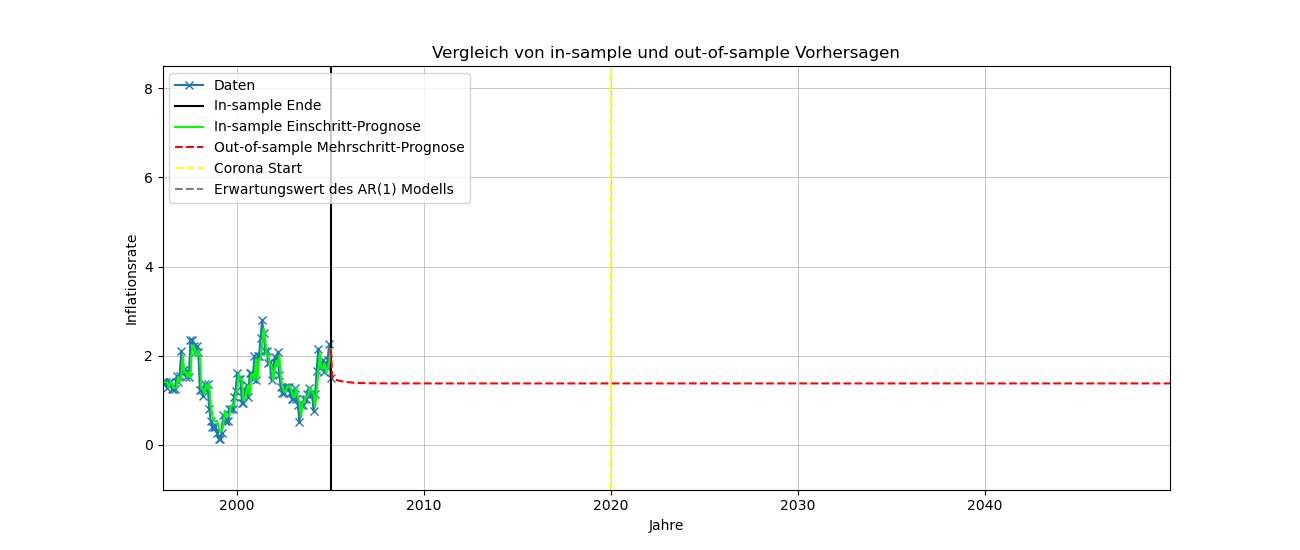

In [22]:
a = InteractiveForecastPlot(ar1, inflation, dummy, 750, figsize=(13, 5.5), ylim=(-1, 8.5))
a.plot()

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from plv.data import load_verbraucherpreisindex, max_inflation, corona_begin
from plv.plot import plot_ts, plot_seasonality, plot_is_oos_forecast

inflation = load_verbraucherpreisindex(filter_columns=["inflation"])

In [2]:
pre_corona = inflation.loc[:"2019"].copy()
pre_corona = inflation.copy()
y = inflation.copy()
print(y.index[-1])

2023-08-01 00:00:00


In [3]:
from plv.model import CrisisDummy, AR
print(corona_begin)
print(max_inflation)
dummy = CrisisDummy(start=corona_begin, end=max_inflation)

2020-01-01
2023-02-01


In [94]:
ar = AR(lags=[1])

In [104]:
import datetime
ar.fit(y)

n = len(pd.date_range(y.index[0], "2049-12-01", freq="MS"))
pd.date_range(y.index[0], "2049-12-01", freq="MS")

# ar.res.predict(0, n)

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2049-03-01', '2049-04-01', '2049-05-01', '2049-06-01',
               '2049-07-01', '2049-08-01', '2049-09-01', '2049-10-01',
               '2049-11-01', '2049-12-01'],
              dtype='datetime64[ns]', length=648, freq='MS')

In [5]:
self = ar
mean_ar = self.params["constant"] / (1 - self.params["a"])
mean_ar
mean_ar + self.dummy.get("2019", "2025") * self.params["dummy"]

TypeError: 'NoneType' object is not subscriptable

7.499999999999993

In [37]:
y.mean()

4.143884288312609

In [61]:
ar.get_mean("2020", "2023")

2020-01-01    8.369758
2020-02-01    8.369758
2020-03-01    8.369758
2020-04-01    8.369758
2020-05-01    8.369758
2020-06-01    8.369758
2020-07-01    8.369758
2020-08-01    8.369758
2020-09-01    8.369758
2020-10-01    8.369758
2020-11-01    8.369758
2020-12-01    8.369758
2021-01-01    8.369758
2021-02-01    8.369758
2021-03-01    8.369758
2021-04-01    8.369758
2021-05-01    8.369758
2021-06-01    8.369758
2021-07-01    8.369758
2021-08-01    8.369758
2021-09-01    8.369758
2021-10-01    8.369758
2021-11-01    8.369758
2021-12-01    8.369758
2022-01-01    8.369758
2022-02-01    8.369758
2022-03-01    8.369758
2022-04-01    8.369758
2022-05-01    8.369758
2022-06-01    8.369758
2022-07-01    8.369758
2022-08-01    8.369758
2022-09-01    8.369758
2022-10-01    8.369758
2022-11-01    8.369758
2022-12-01    8.369758
2023-01-01    8.369758
Freq: MS, dtype: float64

In [125]:
ar.params["constant"] / (1 - ar.params["a"])

-10.891308063904487

In [126]:
y.mean()

1.3920277205686598

In [98]:
y

2020-01-01    2.149437
2020-02-01    2.038736
2020-03-01    1.827411
2020-04-01    1.006036
2020-05-01    0.803213
2020-06-01    0.600601
2020-07-01   -0.598205
2020-08-01   -0.499002
2020-09-01   -0.499002
2020-10-01   -0.299401
2020-11-01    0.201005
2020-12-01        -0.2
2021-01-01    1.202405
2021-02-01    1.498501
2021-03-01    1.794616
2021-04-01    1.992032
2021-05-01    2.191235
2021-06-01     2.38806
2021-07-01    3.711133
Freq: MS, Name: inflation, dtype: Float64

In [ ]:
# Je näher an nicht-stationär desto volatiler wird die Schätzung für den Mittelwert aus dem AR(1) Modell
# Siehe inflation.loc["2020-01-01":"2021-06"] -> inflation.loc["2020-01-01":"2021-07"]

1996-01-01 00:00:00 2018-12-01 00:00:00
{'constant': 0.13223958819844367, 'a': 0.9073279910092371, 'dummy': 0.0}


(-1.0, 20.0)

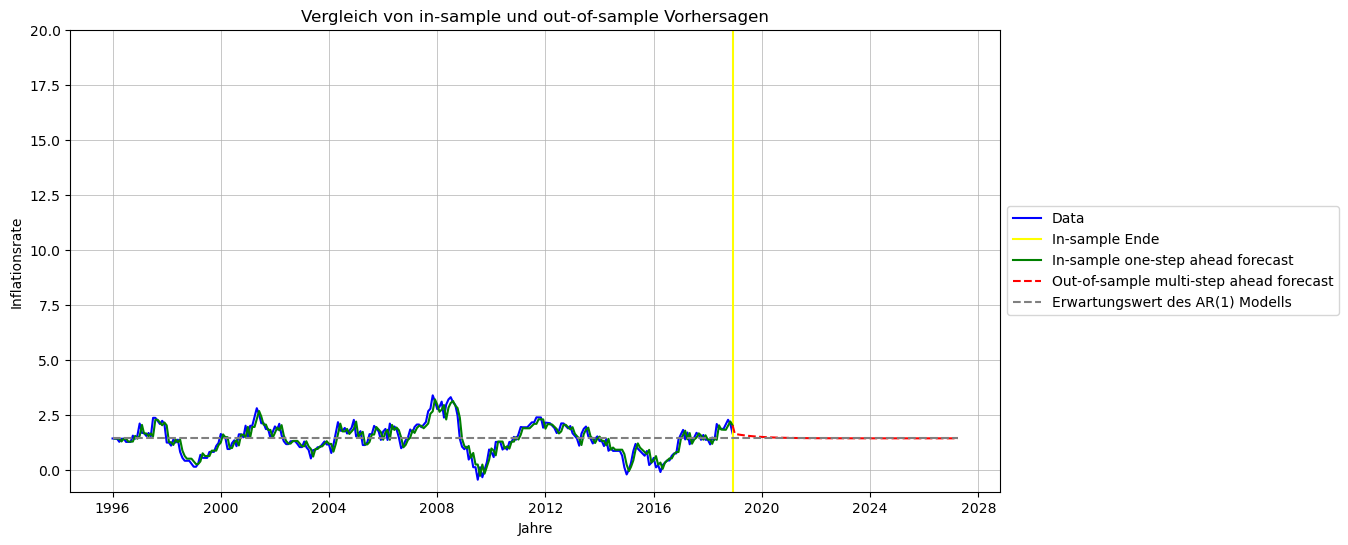

In [78]:
import matplotlib.pyplot as plt

y = inflation.loc[:"2018"].copy()
print(y.index[0], y.index[-1])
# y = inflation.copy()
# ar.fit(y, dummy)
print(ar.params)
# print(ar.get_mean("2019", "2023"))  # outside crisis time
# ar.oos_forecast(300)
# plt.figure(figsize=(12, 6));
plot_is_oos_forecast(ar, 100, oos_data=None, plot_mean=True);
plt.ylim(-1, 20)

In [92]:
X = y.shift(1).to_frame().assign(constant=1)
d = X.assign(y=y)
d = d.iloc[1:, :]
d

,inflation,constant,y
2020-02-01,2.149437,1,2.038736
2020-03-01,2.038736,1,1.827411
2020-04-01,1.827411,1,1.006036
2020-05-01,1.006036,1,0.803213
2020-06-01,0.803213,1,0.600601
2020-07-01,0.600601,1,-0.598205
2020-08-01,-0.598205,1,-0.499002
2020-09-01,-0.499002,1,-0.499002
2020-10-01,-0.499002,1,-0.299401
2020-11-01,-0.299401,1,0.201005


In [95]:
import statsmodels.api as sm


model = sm.OLS(d["y"].to_numpy().astype(float), d[["constant", "inflation"]].to_numpy().astype(float))
results = model.fit()
results.params

array([0.10250626, 0.98389467])

In [52]:
### corona dummy
import pandas as pd
corona_dummy = pd.Series(0, index=pd.date_range(start=inflation.index[0], end='2049-12-01', freq='MS'))
max_inflation = "2023-02-01"
corona_dummy.loc["2020":max_inflation] = 1

class CrisisDummy:
    def __init__(self, start: str = "2020", end: str = max_inflation):
        self.start = start
        self.end = end
    def get(self, lb: str = '1996-01-01', ub: str = '2049-12-01') -> pd.Series:
        dummy = pd.Series(0, index=pd.date_range(start=lb, end=ub, freq='MS'))
        dummy.loc[self.start:self.end] = 1
        return dummy

dummy = CrisisDummy(start="2020-01-01", end=max_inflation)
# dummy = CrisisDummy(start="2020-01-01", end="2022-01-01")
dummy = CrisisDummy(start="2020-01-01", end="2023-08-01")
dummy_is = dummy.get(ub=pre_corona.index[-1])
# dummy_is.loc["2019-11-01":"2023-04-01"]

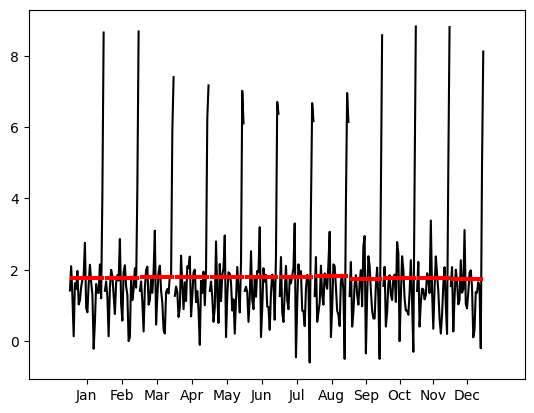

In [53]:
plot_seasonality(pre_corona);

In [7]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(
    pre_corona.to_numpy(), lags = [1], seasonal=False, 
    exog=dummy_is.to_numpy()
)
# res = model.fit()
model = model.fit() # need to assign this! because it returns an result instance and only this can use predict without providing the params
# model.__class__ = res

NameError: name 'dummy_is' is not defined

In [141]:
from pandas.tseries.offsets import DateOffset

forecast_period = 10*30  # 300
forecast_period = 300
ts = pre_corona
ub = pd.date_range(start=ts.index[-1], periods=forecast_period, freq="MS")[-1]
dummy_oos = dummy.get(lb=ts.index[-1] + pd.DateOffset(months=1), ub=ts.index[-1] + pd.DateOffset(months=forecast_period))



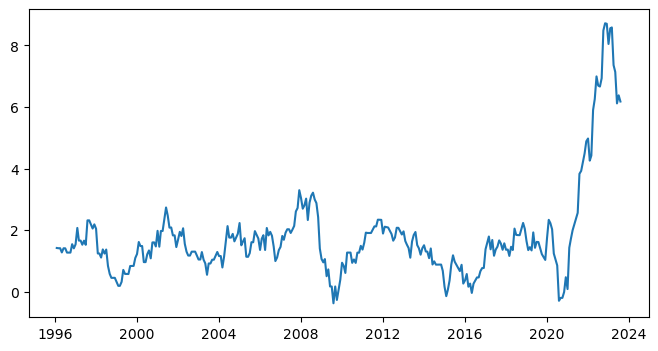

In [142]:
forecast_values = model.predict(start=0, end=len(ts) + forecast_period - 1, dynamic=False, 
                                exog=dummy_is.to_numpy(), exog_oos=dummy_oos.to_numpy()
                               )
index = pd.date_range(start=pre_corona.index[0], periods=len(forecast_values), freq='MS')
forecast = pd.Series(forecast_values, index=index)
forecast_is = forecast.loc[:ts.index[-1]]
forecast_oos = forecast.loc[ts.index[-1] + pd.DateOffset(months=1):]
forecast
plot_ts(forecast_is)

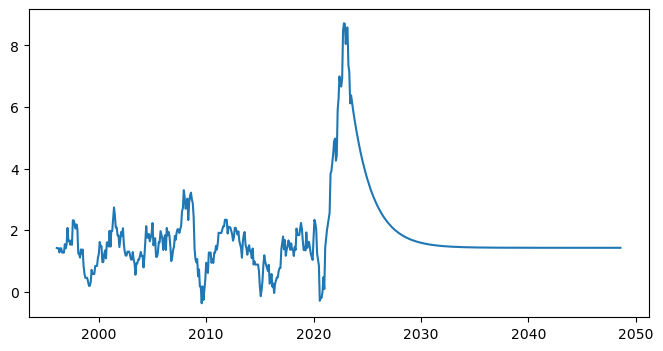

In [149]:
forecast_values = model.predict(start=0, end=len(ts) + forecast_period - 1, dynamic=False, 
                                exog=dummy_is.to_numpy(), exog_oos=dummy_oos.to_numpy()
                               )
index = pd.date_range(start=pre_corona.index[0], periods=len(forecast_values), freq='MS')
forecast = pd.Series(forecast_values, index=index)
forecast_is = forecast.loc[:ts.index[-1]]
forecast_oos = forecast.loc[ts.index[-1] + pd.DateOffset(months=1):]
forecast
plot_ts(forecast)

In [137]:
forecast_is

1996-01-01         NaN
1996-02-01    1.420724
1996-03-01    1.413042
1996-04-01    1.413042
1996-05-01    1.276121
                ...   
2023-04-01    7.361847
2023-05-01    7.140303
2023-06-01    6.118806
2023-07-01    6.380350
2023-08-01    6.179114
Freq: MS, Length: 332, dtype: float64

2023-08-01    6.179114
Freq: MS, dtype: float64

2023-08-01    6.179114
2023-09-01    5.941129
2023-10-01    5.748148
2023-11-01    5.563416
2023-12-01    5.386581
                ...   
2048-04-01    1.426781
2048-05-01    1.426780
2048-06-01    1.426780
2048-07-01    1.426779
2048-08-01    1.426779
Freq: MS, Length: 301, dtype: float64

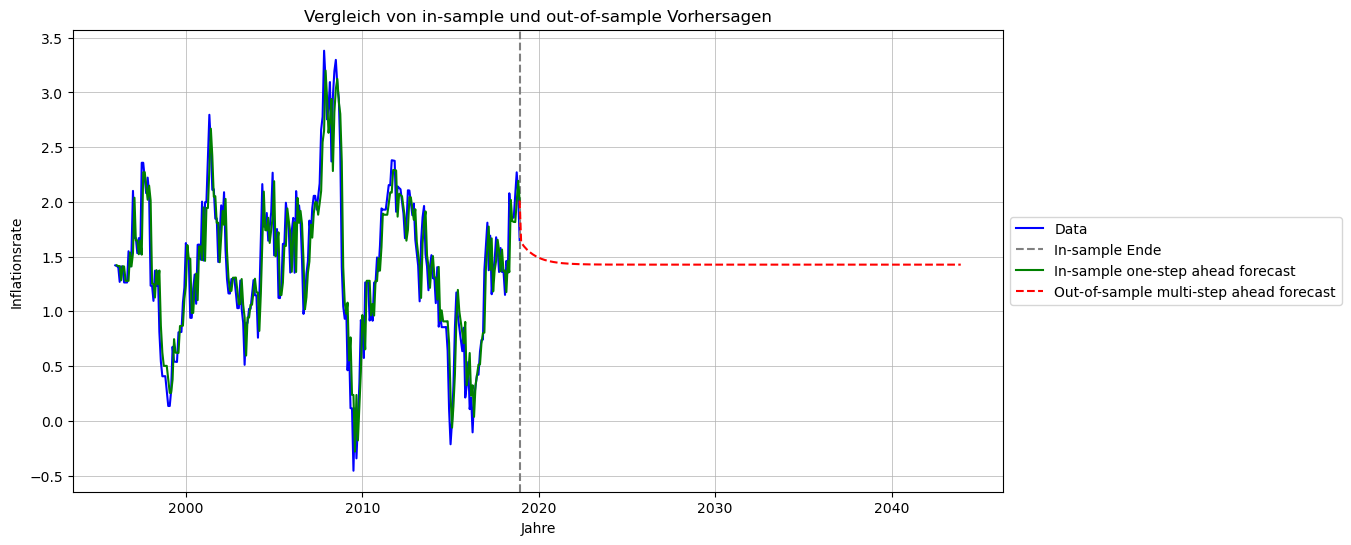

In [72]:
def plot_is_oos_pred(is_pred, oos_pred):
    ...
import pandas as pd

ts = y

forecast = ar.oos_forecast(300)

forecast_is = forecast.loc[:ts.index[-1]]
forecast_oos = forecast.loc[ts.index[-1] + pd.DateOffset(months=1):]

import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))  # Optional: Set the figure size

# plt.plot(ts.index, ts, color='gray', label='Data')

# plt.plot(ts.index, ts, color='black', marker='x', linestyle="", label='Data')

plt.plot(ts.index, ts, color='blue', linestyle='-', label='Data')

# Add a vertical line at x-coordinate 5
plt.axvline(x=ts.index[-1], color='gray', linestyle='--', label='In-sample Ende')

# Plot the first vector as a blue solid line
plt.plot(forecast_is.index, forecast_is, color='green', linestyle='-', label='In-sample one-step ahead forecast')

forecast_oos_ = pd.concat([forecast_is.tail(1), forecast_oos])

# Plot the second vector as a red dotted line
plt.plot(forecast_oos_.index, forecast_oos_, color='red', linestyle='--', label='Out-of-sample multi-step ahead forecast')


# Add labels and a legend
plt.xlabel('Jahre')
plt.ylabel('Inflationsrate')
plt.title('Vergleich von in-sample und out-of-sample Vorhersagen')

plt.legend()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ensure there is enough space on the right for the legend
# plt.tight_layout()

# plt.grid(linewidth=0.2)



# Show the plot
plt.grid(True, linewidth=0.5) 

In [ ]:
def plot_is_oos_pred(is_pred, oos_pred):
    ...
import pandas as pd

ts = y

forecast = ar.oos_forecast(300)

forecast_is = forecast.loc[:ts.index[-1]]
forecast_oos = forecast.loc[ts.index[-1] + pd.DateOffset(months=1):]

import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))  # Optional: Set the figure size

# plt.plot(ts.index, ts, color='gray', label='Data')

# plt.plot(ts.index, ts, color='black', marker='x', linestyle="", label='Data')

plt.plot(ts.index, ts, color='blue', linestyle='-', label='Data')

# Add a vertical line at x-coordinate 5
plt.axvline(x=ts.index[-1], color='gray', linestyle='--', label='In-sample Ende')

# Plot the first vector as a blue solid line
plt.plot(forecast_is.index, forecast_is, color='green', linestyle='-', label='In-sample one-step ahead forecast')

forecast_oos_ = pd.concat([forecast_is.tail(1), forecast_oos])

# Plot the second vector as a red dotted line
plt.plot(forecast_oos_.index, forecast_oos_, color='red', linestyle='--', label='Out-of-sample multi-step ahead forecast')


# Add labels and a legend
plt.xlabel('Jahre')
plt.ylabel('Inflationsrate')
plt.title('Vergleich von in-sample und out-of-sample Vorhersagen')

plt.legend()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ensure there is enough space on the right for the legend
# plt.tight_layout()

# plt.grid(linewidth=0.2)



# Show the plot
plt.grid(True, linewidth=0.5) 

In [89]:
vars(model)
vars(model._results)

{'data': <statsmodels.base.data.ModelData at 0x7fb2731ba690>,
 '_params': array([0.0414051 , 0.98463948]),
 'model': <statsmodels.tsa.ar_model.AutoReg at 0x7fb273206810>,
 '_data_attr': [],
 '_data_in_cache': ['fittedvalues', 'resid', 'wresid'],
 'normalized_cov_params': array([[ 0.00696798, -0.00223393],
        [-0.00223393,  0.00126442]]),
 '_use_t': False,
 '_cache': {},
 '_nobs': 331,
 '_n_totobs': 332,
 '_df_model': 2,
 '_ar_lags': [1],
 '_max_lag': 1,
 '_hold_back': 1,
 'cov_params_default': array([[ 0.00090671, -0.00029069],
        [-0.00029069,  0.00016453]]),
 '_summary_text': ''}

In [83]:
# mean
0.137/(1-0.9)

1.3700000000000003

In [81]:
vars(model)
vars(model._results)

{'data': <statsmodels.base.data.ModelData at 0x7fb27378a550>,
 '_params': array([0.0414051 , 0.98463948]),
 'model': <statsmodels.tsa.ar_model.AutoReg at 0x7fb27320df10>,
 '_data_attr': [],
 '_data_in_cache': ['fittedvalues', 'resid', 'wresid'],
 'normalized_cov_params': array([[ 0.00696798, -0.00223393],
        [-0.00223393,  0.00126442]]),
 '_use_t': False,
 '_cache': {},
 '_nobs': 331,
 '_n_totobs': 332,
 '_df_model': 2,
 '_ar_lags': [1],
 '_max_lag': 1,
 '_hold_back': 1,
 'cov_params_default': array([[ 0.00090671, -0.00029069],
        [-0.00029069,  0.00016453]]),
 '_summary_text': ''}

In [82]:
# mean
0.051/(1-0.98)

2.5499999999999976

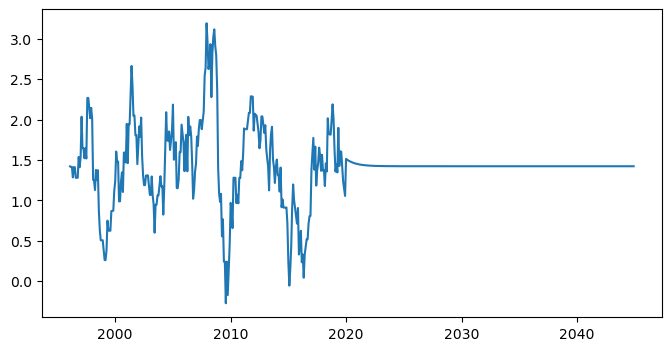

In [71]:
import pandas as pd
plot_ts(forecast)

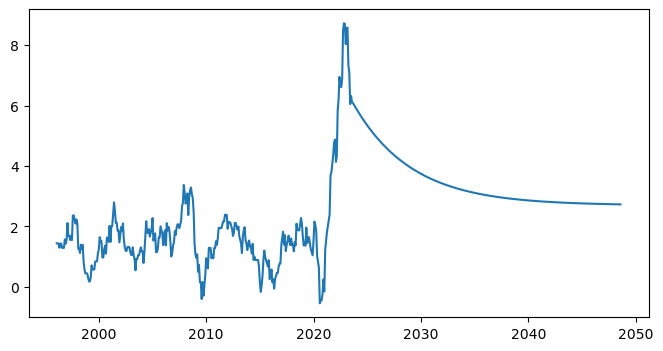

In [59]:
import pandas as pd
plot_ts(forecast)

In [ ]:
Note: The mean is higher

In [ ]:
Uses the first AR(1) and then do the predictions -> Add a Corona Dummy

In [86]:
model.plot_predict?

# Literatur

Hamilton, James D. Time Series Analysis. Princeton University Press, 1994. https://doi.org/10.2307/j.ctv14jx6sm.

Lütkepohl, Helmut. New Introduction to Multiple Time Series Analysis. Springer, 2005. https://doi.org/10.1007/978-3-540-27752-1